# Домашнее задание 5

В этом задании предлагается поближе познакомиться с `решающими деревьями` и `случайными лесами`, а также поучаствовать в соревновании **House Prices: Advanced Regression Techniques**

Оформление дз:
Присылайте выполненное на почту `mlphystech@gmail.com` файлы .pdf и .ipynb или ссылку на свой гитхаб.

**Дедлайн: 25 апреля 23:59**

при составлении ДЗ использованы материалы кафедры **АТП**

## Теоретическая часть
#### 1.5 балла

1. Что такое решающее дерево? Почему так называется?
2. В чем основная идея этого алгоритма?
3. Что такое решающее правило?
4. Что можно сказать про проблему переобучения для решающих деревьев?
5. Что такое отбор признаков по feature_importance? 
6. Что такое PCA?

## Практическая чать 1. Решающие деревья

Здесь предлагается использовать решающие деревья для того, чтобы поработать с датасетом, в котором содержится информация о картинках с ядовитыми и съедобными грибами: https://www.kaggle.com/uciml/mushroom-classification

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# считайте данные из датасета при помощи функции read_csv:
df = ...

In [ ]:
# проверьте, что в датасете нет пустых строк:
df[df.isnull().any(axis=1)]

In [ ]:
from sklearn.model_selection import train_test_split


# Разбейте данные на тестовую и тренировочную части
y = df['class']
x = df.drop(['class'], axis=1)
x = pd.get_dummies(x)
y = pd.get_dummies(y)
# Посмотрите на информацию о данных. Что вы можете сказать о них? 
x.info()
y.info()
x.dtypes
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

Займемся отбором параметров. Используем кросс-валидацию

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import tree # здесь лежит нужный нам классификатор DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[9,10,11,12],
              'class_weight':('balanced', None),
              'presort':(False,True),
             }


tr = # передайте сюда классификатор (решающее дерево)
gsearch = GridSearchCV(tr, parameters)
q=gsearch.fit(# тут ваш код)
model = gsearch.best_estimator_
gsearch.cv_results_
scores = cross_val_score(# тут ваш код)
# scores
model.fit(# тут ваш код)

 Выведите `gsearch`. Что вы можете сказать об этом? Что это и зачем нужно?

In [ ]:
# Посчитайте скор
score = model.score(#тут ваш код)
...

Давайте посмотрим, как же устроено наше дерево? Сделать можно это с помощью следующего кода: 

P.S. возможно, что вам придется установить библиотеку `graphviz`. Устанавливается она точно также, как и любая другая бибилиотека.

In [ ]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X_test.columns,
                               class_names=y_test.columns,
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

Какие выводы вы можете сделать об устройстве решающего дерева?


## Практическая часть 2. Случайные леса.
### 2 балла
В этой части задания мы будем работать с датасетом https://www.kaggle.com/c/house-prices-advanced-regression-techniques c `kaggle`.

Предложенный код можно использовать как угодно -- если вам удобнее написать все свое, можете все удалить

In [43]:
%matplotlib inline

In [44]:
# скачайте данные train и test при помощи функции read_csv 
train = ...
test = ...

In [45]:
# выведите названия столбцов. 
# Предположите, какие из них могут быть важны, исходя из вашего жизненного опыта и интуиции?
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

выделим необходимые данные:

In [46]:
labels = train.SalePrice

In [47]:
labels.head(4)

0    208500
1    181500
2    223500
3    140000
Name: SalePrice, dtype: int64

Постройте график распределения цен на жилье. Какое распределение оно вам напоминает?

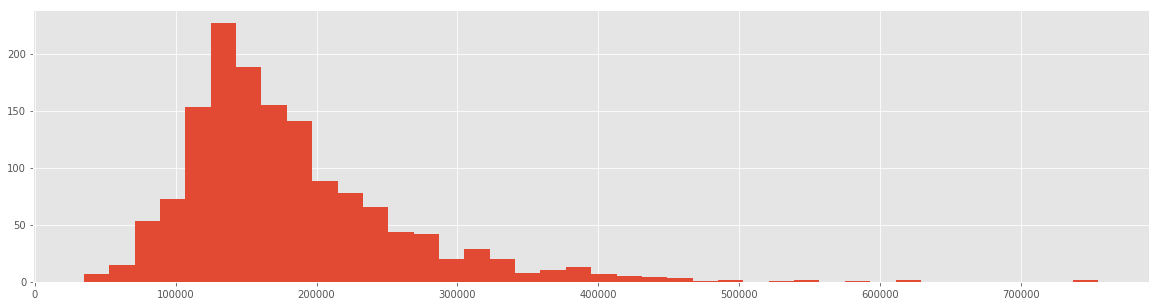

In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(20,5))
plt.hist(train['SalePrice'],bins=40)
plt.show()

In [48]:
# выведите данные
print(train.shape)


(1460, 81)


Cоздадим датасет и назовем его `all` из конкатенации train, test.

P.S. Если будете использовать функцию `concat`, не забудьте установить `axis`=0

In [285]:
all = pd.concat([...], ...)

Заменим пустые данные `null` на средние значения и отформатируем данные:

In [11]:
print("{0:15}\t{1}\t{2}".format("Name", "NaNs", "#unique"))
for col in train.columns:
    print("{0:15}\t{1:.2f}\t{2}".format(col, train[col].isnull().mean(), train[col].nunique()))

Name           	NaNs	#unique
Id             	0.00	1460
MSSubClass     	0.00	15
MSZoning       	0.00	5
LotFrontage    	0.18	110
LotArea        	0.00	1073
Street         	0.00	2
Alley          	0.94	2
LotShape       	0.00	4
LandContour    	0.00	4
Utilities      	0.00	2
LotConfig      	0.00	5
LandSlope      	0.00	3
Neighborhood   	0.00	25
Condition1     	0.00	9
Condition2     	0.00	8
BldgType       	0.00	5
HouseStyle     	0.00	8
OverallQual    	0.00	10
OverallCond    	0.00	9
YearBuilt      	0.00	112
YearRemodAdd   	0.00	61
RoofStyle      	0.00	6
RoofMatl       	0.00	8
Exterior1st    	0.00	15
Exterior2nd    	0.00	16
MasVnrType     	0.01	4
MasVnrArea     	0.01	327
ExterQual      	0.00	4
ExterCond      	0.00	5
Foundation     	0.00	6
BsmtQual       	0.03	4
BsmtCond       	0.03	4
BsmtExposure   	0.03	4
BsmtFinType1   	0.03	6
BsmtFinSF1     	0.00	637
BsmtFinType2   	0.03	6
BsmtFinSF2     	0.00	144
BsmtUnfSF      	0.00	780
TotalBsmtSF    	0.00	721
Heating        	0.00	6
HeatingQC      	0.00	5
Ce

Используйте известные вам методы для отбора признаков. Удалите ненужные признаки.
Не забудьте нормализовать (оцифровать) данные!

In [ ]:
# тут ваш код

In [15]:
# some useless features
train["MiscFeature"].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [16]:
train["Fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [ ]:
to_drop = ["MiscFeature", "PoolQC"]
to_replace_to_none = ["Fence", "FireplaceQu", "Alley"]

for col in to_replace_to_none:
    #тут ваш код
    
all.drop(to_drop, axis=1, inplace=True, errors="ignore")
all.fillna(-1, inplace=True)

Визуализируем данные:

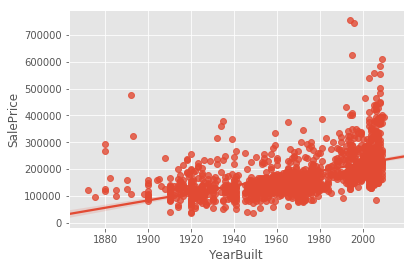

In [24]:
sns.regplot(train["YearBuilt"], labels)

Что можно сказать о таком распределении данных?

'\nA\tAgriculture\nC\tCommercial\nFV\tFloating Village Residential\nI\tIndustrial\nRH\tResidential High Density\nRL\tResidential Low Density\nRP\tResidential Low Density Park \nRM\tResidential Medium Density\n'

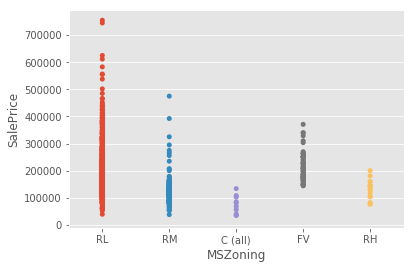

In [22]:
sns.stripplot(train["MSZoning"], labels)
"""
A	Agriculture
C	Commercial
FV	Floating Village Residential
I	Industrial
RH	Residential High Density
RL	Residential Low Density
RP	Residential Low Density Park 
RM	Residential Medium Density
"""

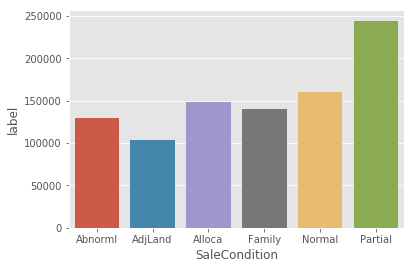

In [23]:
group_col = "SaleCondition"

train_with_labels = train.copy()
train_with_labels["label"] = labels
groupped = train_with_labels.groupby(group_col).median().reset_index()[[group_col, "label"]]
sns.barplot(groupped[group_col], groupped.label)

In [ ]:
categorial = #тут ваши отобранные признаки
for col in categorial:
    all[col] = all[col].factorize()[0]
    
train = all.iloc[:train.shape[0]]
test = all.iloc[train.shape[0]:]

In [298]:
from sklearn.feature_extraction import DictVectorizer
 
#  энкодер, которым Вы можете воспользоваться
def encode_onehot(df, cols):

    vec = DictVectorizer()
    
    vec_data = pd.DataFrame(vec.fit_transform(df[cols].to_dict(outtype='records')).toarray())
    vec_data.columns = vec.get_feature_names()
    vec_data.index = df.index
    
    df = df.drop(cols, axis=1)
    df = df.join(vec_data)
    return df



In [30]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=3, random_state=0)

In [31]:
# выведите ваш датасет. Посмотрите, как он выглядит после нормализации и отбора признаков?

In [ ]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

to_encode = #отобранные фичи
df = train
for column in to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

Функция для формирования посылки в `kaggle`

In [40]:
def submit(preds):
    submission = pd.read_csv("sample_submission.csv")
    submission["SalePrice"] = preds
    submission.to_csv("submission.csv", index=False)


In [ ]:
#train = encode_onehot (train,train.columns)
clf = RandomForestClassifier(...)
clf.fit(...)
preds = clf.predict(test)
submit(np.expm1(...))

In [41]:
def code_freq(data, col):
    return data[col].map(data.groupby(col).count().iloc[:, 0] / data.shape[0])

In [42]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_predict

class MeanEncoder(BaseEstimator):
    def __init__(self, col):
        self.col = col
        
    def fit(self, X, y):
        X_copy = X.copy()
        X_copy['target'] = y
        self.encoding = X_copy.groupby(col)['target'].mean()
        return self
        
    def predict(self, X):
        return X[col].map(self.encoding).fillna(-1)



def code_mean(train, test, labels, col, cv):
    mean_encoder = MeanEncoder(col)
    train_col = cross_val_predict(mean_encoder, train, labels, cv=cv)
    test_col = mean_encoder.fit(train, labels).predict(test)
    
    return train_col, test_col

Какой скор вам удалось получить? Как вы считаете, результат хороший или не очень?

## Практическая часть 3. Cлучайные леса.

#### 3 балла
Подумайте, какие образом можно улучшить скор?

Вот идеи:
1. Попробовать подобрать нужные параметры. Для этого можно исследовать данные, посмотреть, как они распределены и что важно, а что -- не очень
2. Найти, какие категориальные признаки являются ординальными и закодировать их соответственно
3. Найти наиболее важные категориальные признаки и попробовать их закодировать разными способами
4. Сгенерировать новые признаки
